In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [2]:
df_train=X
df_predict=y

In [3]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [4]:
df_predict.head()

,num
0,0
1,2
2,1
3,0
4,0


In [5]:
#Check for null values
df_train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [6]:
#drop the null values
df_train.fillna(0,inplace=True)

C:\Users\pooja\AppData\Local\Temp\ipykernel_21604\704194881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.fillna(0,inplace=True)


In [7]:
df_train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [8]:
df_predict.isnull().sum()

num    0
dtype: int64

<Axes: >

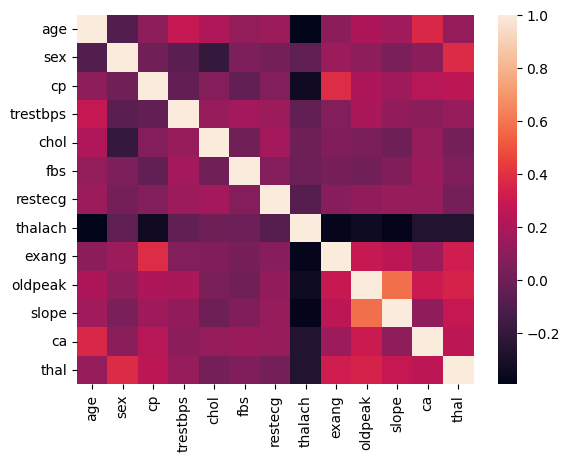

In [9]:
#visualize the relationship between the variables
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_train.corr())

In [10]:
import pandas as pd
numerical_features=['age','trestbps','chol','thalach','oldpeak','ca']
from sklearn.preprocessing import StandardScaler, Normalizer
scaler=StandardScaler()
normalize= Normalizer()
data=pd.DataFrame()


In [11]:
scaler = StandardScaler()
df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])

C:\Users\pooja\AppData\Local\Temp\ipykernel_21604\1155354926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])


In [12]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.948726,1,1,0.757525,-0.264900,1,2,0.017197,0,1.087338,3,-0.711131,6.0
1,1.392002,1,4,1.611220,0.760415,0,2,-1.821905,1,0.397182,2,2.504881,3.0
2,1.392002,1,4,-0.665300,-0.342283,0,2,-0.902354,1,1.346147,2,1.432877,7.0
3,-1.932564,1,3,-0.096170,0.063974,0,0,1.637359,0,2.122573,3,-0.711131,3.0
4,-1.489288,0,2,-0.096170,-0.825922,0,2,0.980537,0,0.310912,1,-0.711131,3.0


In [13]:
df_train[numerical_features]=normalize.fit_transform(df_train[numerical_features])

C:\Users\pooja\AppData\Local\Temp\ipykernel_21604\796314410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[numerical_features]=normalize.fit_transform(df_train[numerical_features])


In [14]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.527689,1,1,0.421341,-0.147340,1,2,0.009565,0,0.604786,3,-0.395537,6.0
1,0.361061,1,4,0.417922,0.197238,0,2,-0.472570,1,0.103022,2,0.649722,3.0
2,0.519601,1,4,-0.248341,-0.127766,0,2,-0.336827,1,0.502485,2,0.534859,7.0
3,-0.571372,1,3,-0.028433,0.018914,0,0,0.484093,0,0.627549,3,-0.210249,3.0
4,-0.704157,0,2,-0.045470,-0.390508,0,2,0.463612,0,0.147004,1,-0.336233,3.0


In [15]:
df_train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test, y_train, y_test=train_test_split(df_train, df_predict, test_size=0.2, random_state=42)

In [17]:
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

c:\Users\pooja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [21]:
from sklearn.metrics import accuracy_score, roc_curve, f1_score, recall_score, precision_score, confusion_matrix

acc=accuracy_score(y_test,y_pred)
print(acc)

0.5737704918032787


In [23]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[28  0  1  0  0]
 [ 2  3  2  5  0]
 [ 5  1  2  1  0]
 [ 1  2  2  2  0]
 [ 0  1  3  0  0]]
